In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv("pengaruh_media_sosial_ipk_mahasiswa.csv", delimiter=";")

In [3]:
# Mengecek dataset
print(df.head())

   No                 Nama : Jenis Kelamin :  Tingkat Semester :  \
0   1      Siti Rahmah Basri       Perempuan                   3   
1   2  Nadya Elfareta Azarin       Perempuan                   3   
2   3       Ni Wayan Erdiani       Perempuan                   3   
3   4           Nurul Aulia        Perempuan                   3   
4   5                  Dinda       Perempuan                   3   

  Program Studi/Jurusan :  \
0      Teknik Informatika   
1      Teknik Informatika   
2      Teknik Informatika   
3      Teknik informatika   
4      Teknik Informatika   

  Berapa lama Anda menggunakan Media Sosial dalam sehari?  \
0                                   Lebih dari 6 jam        
1                                  Kurang dari 6 jam        
2                                   Lebih dari 6 jam        
3                                   Lebih dari 6 jam        
4                                  Kurang dari 6 jam        

  Berapa lama Anda tidur dalam sehari?  \
0      

In [4]:
# Data fitur
x = df["Berapa lama Anda menggunakan Media Sosial dalam sehari?"]

# Data target
y = df["Apakah penggunaan Media Sosial dapat mempengaruhi prestasi akademik Anda?"]

# Membagi dataset antara train dan test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=109)

In [6]:
print(X_train.head)


<bound method NDFrame.head of 56      Lebih dari 6 jam
221    Kurang dari 6 jam
35      Lebih dari 6 jam
66      Lebih dari 6 jam
215     Lebih dari 6 jam
             ...        
75      Lebih dari 6 jam
141    Kurang dari 6 jam
297     Lebih dari 6 jam
245    Kurang dari 6 jam
262    Kurang dari 6 jam
Name: Berapa lama Anda menggunakan Media Sosial dalam sehari?, Length: 209, dtype: object>


In [7]:
print(y_train.head)

<bound method NDFrame.head of 56     Tidak
221    Tidak
35        Ya
66        Ya
215       Ya
       ...  
75        Ya
141       Ya
297    Tidak
245    Tidak
262    Tidak
Name: Apakah penggunaan Media Sosial dapat mempengaruhi prestasi akademik Anda?, Length: 209, dtype: object>


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fitur
X_train = le.fit_transform(X_train)
X_test = le.fit_transform(X_test)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Target
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)



In [9]:
# Train data
model = BernoulliNB()
model.fit(X_train, y_train)
accuracy = model.score(X_train, y_train)
print("Accuracy of BernoulliNB: {:.2f}%".format(accuracy * 100))

Accuracy of BernoulliNB: 55.02%


C:\Users\haika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# Test data
model = BernoulliNB()
model.fit(X_test, y_test)

# prediksi
y_pred = model.predict(X_test)

# menghitung akurasi data test
accuracy = model.score(X_test, y_test)
print("Accuracy of BernoulliNB: {:.2f}%".format(accuracy * 100))



Accuracy of BernoulliNB: 55.56%


C:\Users\haika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.30      0.37        40
           2       0.58      0.78      0.66        49

    accuracy                           0.56        90
   macro avg       0.36      0.36      0.35        90
weighted avg       0.54      0.56      0.53        90



C:\Users\haika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\haika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\haika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471

# Visualization

In [16]:
counts = df['label'].value_counts()
print(counts)

KeyError: ('Ya', 'Tidak')

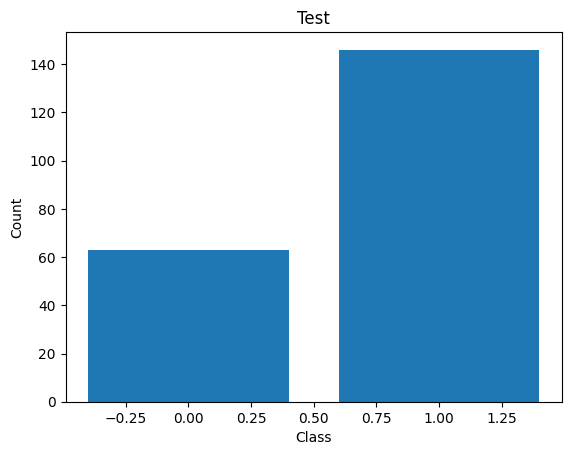

In [15]:


counts.plot(kind='bar')
plt.bar(range(len(counts)), counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Test')
plt.show()